In [1]:
from fenics import *
import numpy as np

%matplotlib inline

In [2]:
# Equation parameters
T = 2.0
num_steps = 10
dt = T / num_steps

alpha = 3
beta = 1.2

In [3]:
# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

In [4]:
# Boundary condition
def boundary(x, on_boundary):
    return on_boundary

u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t', degree=2, alpha=alpha, beta=beta, t=0)
bc = DirichletBC(V, u_D, boundary)

In [5]:
#Define initial value at time = 0
u_n = project(u_D, V)

In [6]:
#Define problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2 * alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

t = 0.00, error = 0.07
t = 0.20, error = 0.01
t = 0.40, error = 0.00
t = 0.60, error = 0.00
t = 0.80, error = 0.00
t = 1.00, error = 0.00
t = 1.20, error = 0.00
t = 1.40, error = 0.00
t = 1.60, error = 0.00
t = 1.80, error = 0.00


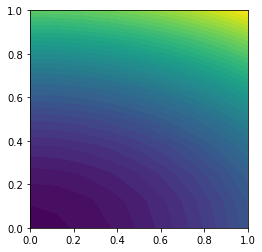

In [7]:
# Time-stepping solution
u = Function(V)
t = 0

vtkfile = File('heat_gaussian_solution/solution.pvd')

for n in range(num_steps):
    solve(a == L, u, bc)
    
    vtkfile << (u, t)
    plot(u)
    
    vertex_values_u = u.compute_vertex_values(mesh)
    u_e = u_D.compute_vertex_values(mesh)
    error = np.abs(vertex_values_u - u_e).max()
    
    print('t = %.2f, error = %.2f' % (t, error))
    
    # Update previous solution
    u_n.assign(u)
    
    # Update current time
    t += dt
    u_D.t = t